In [1]:
import numpy as np
import torch
import pandas as pd
import torch.nn as nn
import torchvision.models as models
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

standard_flag = False

train_xlsx = '训练集3-1.xlsx'
test_xlsx = '验证集3.xlsx'

c:\Users\Rainy\.conda\envs\pytorch-onnx\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 读取数据

In [2]:
df = pd.read_excel(train_xlsx, header=None)
df

,0,1,2,3,4,5,6,7,8
0,1.17362,1.581690,0.79089,1.23740,0.819020,1.228070,0.921780,1.405650,0
1,1.01716,1.395400,0.82012,1.35819,0.692390,1.115450,0.671460,1.032660,0
2,0.87372,1.318870,0.71429,1.16374,0.986350,1.425120,0.926260,1.304080,0
3,0.90368,1.314130,0.67532,1.25862,0.685480,1.124670,0.852420,1.236510,0
4,0.90515,1.403777,0.94649,1.45071,0.877157,1.328043,0.889893,1.335087,0
...,...,...,...,...,...,...,...,...,...
106,4.23711,10.399287,4.08486,13.43763,4.466397,13.563123,4.596263,11.756757,9
107,4.23941,10.397587,4.08625,13.42993,4.471537,13.572823,4.600393,11.754357,9
108,4.23948,10.395887,4.08107,13.44233,4.472417,13.567323,4.600533,11.738857,9
109,3.10690,7.583840,2.41300,8.54446,3.822900,10.860570,3.779900,9.829480,9


In [3]:
df.describe()

,0,1,2,3,4,5,6,7,8
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,1.152199,2.563188,1.049549,2.712140,1.080809,2.645782,1.123700,2.550054,4.459459
std,1.292892,3.714821,1.197464,4.109680,1.241093,4.003149,1.272476,3.730388,2.903865
min,-0.024310,0.004550,-0.014900,-0.006860,-0.054000,-0.017260,-0.007530,0.002540,0.000000
25%,0.390400,0.519700,0.342305,0.510125,0.370683,0.447053,0.379937,0.450470,2.000000
50%,0.778340,0.899247,0.559880,0.876590,0.483807,0.742810,0.604050,0.831380,4.000000
75%,1.018730,1.430953,0.946630,1.452635,0.939505,1.387275,0.969070,1.360345,7.000000
max,5.175480,14.536860,4.632720,14.925690,4.473337,13.572823,4.708220,12.670780,9.000000


In [4]:
df.corr()

,0,1,2,3,4,5,6,7,8
0,1.000000,0.979236,0.982244,0.976369,0.968630,0.961707,0.974650,0.974667,0.551451
1,0.979236,1.000000,0.983331,0.985781,0.956626,0.962811,0.961530,0.977680,0.615539
2,0.982244,0.983331,1.000000,0.993292,0.979985,0.974286,0.975859,0.974743,0.557995
3,0.976369,0.985781,0.993292,1.000000,0.978882,0.984937,0.974115,0.983299,0.619842
4,0.968630,0.956626,0.979985,0.978882,1.000000,0.991366,0.992576,0.984350,0.559253
5,0.961707,0.962811,0.974286,0.984937,0.991366,1.000000,0.984436,0.992092,0.627254
6,0.974650,0.961530,0.975859,0.974115,0.992576,0.984436,1.000000,0.987687,0.562245
7,0.974667,0.977680,0.974743,0.983299,0.984350,0.992092,0.987687,1.000000,0.630862
8,0.551451,0.615539,0.557995,0.619842,0.559253,0.627254,0.562245,0.630862,1.000000


In [5]:
train_data = df.iloc[:, :8].values  # 前八列
train_labels = df.iloc[:, 8].values  # 第九列

train_data = torch.tensor(train_data, dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.long)

In [6]:
train_data

tensor([[ 1.1736e+00,  1.5817e+00,  7.9089e-01,  1.2374e+00,  8.1902e-01,
          1.2281e+00,  9.2178e-01,  1.4057e+00],
        [ 1.0172e+00,  1.3954e+00,  8.2012e-01,  1.3582e+00,  6.9239e-01,
          1.1155e+00,  6.7146e-01,  1.0327e+00],
        [ 8.7372e-01,  1.3189e+00,  7.1429e-01,  1.1637e+00,  9.8635e-01,
          1.4251e+00,  9.2626e-01,  1.3041e+00],
        [ 9.0368e-01,  1.3141e+00,  6.7532e-01,  1.2586e+00,  6.8548e-01,
          1.1247e+00,  8.5242e-01,  1.2365e+00],
        [ 9.0515e-01,  1.4038e+00,  9.4649e-01,  1.4507e+00,  8.7716e-01,
          1.3280e+00,  8.8989e-01,  1.3351e+00],
        [ 9.0764e-01,  1.4031e+00,  9.4463e-01,  1.4530e+00,  8.7828e-01,
          1.3295e+00,  8.8635e-01,  1.3357e+00],
        [ 9.0950e-01,  1.4162e+00,  9.4507e-01,  1.4518e+00,  8.7691e-01,
          1.3309e+00,  8.8689e-01,  1.3362e+00],
        [ 9.0905e-01,  1.4236e+00,  9.4677e-01,  1.4821e+00,  8.8285e-01,
          1.3302e+00,  8.8853e-01,  1.3358e+00],
        [ 9.1287

In [7]:
train_labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

# 训练

In [8]:

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

'''
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, hidden_size)
        self.fc5 = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.fc4(out)
        out = self.relu(out)
        out = self.fc5(out)
        return out
'''

input_size = 8  # 输入特征
hidden_size = 100 
num_classes = 10 # 输出类别

learning_rate = 0.001  # 学习率
num_epochs = 1000  # 训练轮数

In [9]:
model = NeuralNetwork(input_size, hidden_size, num_classes)
model

NeuralNetwork(
  (fc1): Linear(in_features=8, out_features=100, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_history = []

total_steps = len(train_data)
for epoch in range(num_epochs):
    for i in range(total_steps):
        x = train_data[i].unsqueeze(0) 
        labels = train_labels[i].unsqueeze(0)

        outputs = model(x)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    loss_history.append(loss.item())

    print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_steps}], Loss: {loss.item()}')

Epoch [1/1000], Step [111/111], Loss: 0.08589136600494385
Epoch [2/1000], Step [111/111], Loss: 0.06296119838953018
Epoch [3/1000], Step [111/111], Loss: 0.060124434530735016
Epoch [4/1000], Step [111/111], Loss: 0.060099512338638306
Epoch [5/1000], Step [111/111], Loss: 0.06071919947862625
Epoch [6/1000], Step [111/111], Loss: 0.06179605796933174
Epoch [7/1000], Step [111/111], Loss: 0.06298436969518661
Epoch [8/1000], Step [111/111], Loss: 0.06416813284158707
Epoch [9/1000], Step [111/111], Loss: 0.06489188969135284
Epoch [10/1000], Step [111/111], Loss: 0.06563175469636917
Epoch [11/1000], Step [111/111], Loss: 0.06637408584356308
Epoch [12/1000], Step [111/111], Loss: 0.06714396178722382
Epoch [13/1000], Step [111/111], Loss: 0.0679410845041275
Epoch [14/1000], Step [111/111], Loss: 0.06879755854606628
Epoch [15/1000], Step [111/111], Loss: 0.069786936044693
Epoch [16/1000], Step [111/111], Loss: 0.0708542987704277
Epoch [17/1000], Step [111/111], Loss: 0.07192829251289368
Epoch [1

KeyboardInterrupt: 

In [ ]:
for i in loss_history:
    print(i)

0.08184994012117386
0.05379051715135574
0.05263058468699455
0.054142121225595474
0.05656709894537926
0.05925847589969635
0.06213914230465889
0.06511876732110977
0.06850895285606384
0.0722137987613678
0.07579037547111511
0.07958652824163437
0.08385427296161652
0.0880618616938591
0.09279975295066833
0.09785295277833939
0.10305894166231155
0.10841639339923859
0.11431530117988586
0.12076190114021301
0.1272285133600235
0.13386651873588562
0.139967143535614
0.14588108658790588
0.151791512966156
0.15759265422821045
0.16333220899105072
0.16935263574123383
0.1759398728609085
0.18229050934314728
0.18829883635044098
0.1936115175485611
0.19977237284183502
0.20589104294776917
0.21216951310634613
0.21810463070869446
0.22503194212913513
0.23181366920471191
0.23830682039260864
0.2449362426996231
0.25389376282691956
0.26091229915618896
0.26745888590812683
0.27211880683898926
0.27793923020362854
0.2838996648788452
0.2896229326725006
0.2954484224319458
0.3014124035835266
0.30675366520881653
0.31276810169

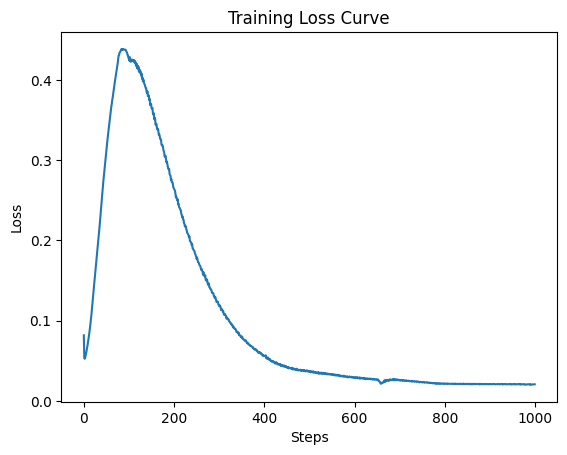

In [ ]:
plt.plot(loss_history)
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

# 保存和加载模型

In [ ]:
torch.save(model.state_dict(), 'bp_10class-100-5layers.params')

# 测试

In [11]:
data_test = pd.read_excel(test_xlsx, header=None)
test_x = np.array(data_test.iloc[:, 0:8])
test_y = np.array(data_test.iloc[:, 8])
test_data = torch.tensor(test_x, dtype=torch.float32)
test_labels = torch.tensor(test_y, dtype=torch.long)

# 评估模式
clone = NeuralNetwork(input_size, hidden_size, num_classes)
clone.load_state_dict(torch.load('bp_10class-100-5layers.params'))
clone.eval()
with torch.no_grad():
    # 预测测试数据
    outputs = clone(test_data)
    _, predicted = torch.max(outputs.data, 1)
    for i in range(len(test_data)):
        print(f"Predicted: {predicted[i]}, Actual: {test_labels[i]}")

    # 计算准确率
    correct = (predicted == test_labels).sum().item()
    total = len(test_data)
    accuracy = correct / total
    print(f"Accuracy: {accuracy * 100}%")

Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 1, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 1, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 0, Actual: 1
Predicted: 2, Actual: 2
Predicted: 2, Ac

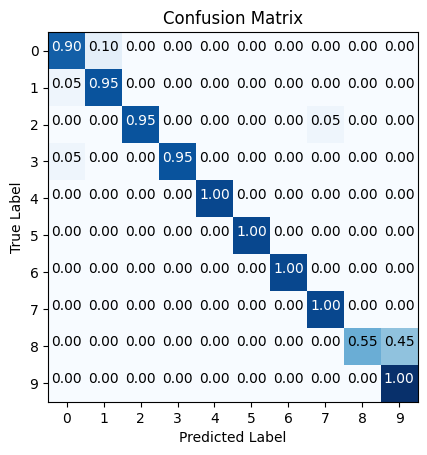

In [12]:
from sklearn.metrics import confusion_matrix
from matplotlib.colors import Normalize

cm = confusion_matrix(test_labels, predicted)

plt.imshow(cm, cmap='Blues', norm=Normalize(vmin=0, vmax=np.max(cm)))
# plt.colorbar()

classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0

# 将混淆矩阵中的每个元素转换为保留两位小数的百分比形式
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm_percentage[i, j], '.2f'),
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

# 计算分类报告
report = classification_report(test_labels, predicted)

# 将报告中每个类别的指标保留小数点后四位
lines = report.split('\n')
new_report = []
for line in lines:
    if line.startswith('weighted avg'):
        items = line.split()
        new_line = '  '.join(items[:2])
        for item in items[2:]:
            if item.isnumeric():
                new_line += f'  {item}'
            else:
                new_line += f'  {float(item):.4f}'
        new_report.append(new_line)
    elif len(line.split()) > 0 and line.split()[0].isdigit():
        items = line.split()
        new_line = '  '.join(items[:2])
        for item in items[2:]:
            new_line += f'  {float(item):.4f}'
        new_report.append(new_line)
    else:
        new_report.append(line)

formatted_report = '\n'.join(new_report)
print(formatted_report)


              precision    recall  f1-score   support

0  0.90  0.9000  0.9000  20.0000
1  0.90  0.9500  0.9300  20.0000
2  1.00  0.9500  0.9700  20.0000
3  1.00  0.9500  0.9700  20.0000
4  1.00  1.0000  1.0000  20.0000
5  1.00  1.0000  1.0000  20.0000
6  1.00  1.0000  1.0000  20.0000
7  0.95  1.0000  0.9800  20.0000
8  1.00  0.5500  0.7100  20.0000
9  0.71  1.0000  0.8300  22.0000

    accuracy                           0.93       202
   macro avg       0.95      0.93      0.93       202
weighted  avg  0.9400  0.9300  0.9300  202



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# 计算预测结果的精确度和召回率
precision, recall, _ = precision_recall_curve(test_labels, predicted)

# 计算PR曲线下的面积
auc_score = auc(recall, precision)

# 绘制PR曲线
plt.plot(recall, precision, label='PR Curve (AUC = %0.2f)' % auc_score)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.title('Precision-Recall Curve')
plt.show()


ValueError: multiclass format is not supported